In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from nltk.corpus import stopwords
import spacy
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from nltk.stem.porter import *
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

In [2]:
train_data = pd.read_csv('datasets/q3/train.csv', sep=',')
test_data = pd.read_csv('datasets/q3/test_without_labels.csv', sep=',')

more_stop_words = ['made','whoever','who','said','day','will','new','now','time','say','second','month','first','going','year','back','people','case','according']

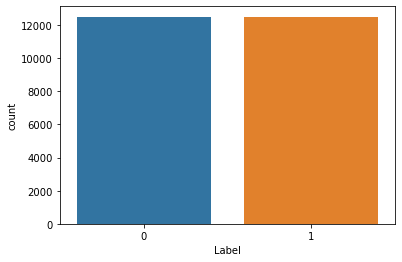

In [4]:
sns.countplot(x='Label',data=train_data)

In [3]:
#X = train_data['Content'].head(10000)
#y = train_data['Label'].head(10000)
X = train_data['Content']
y = train_data['Label']
X = np.array(X).flatten()
y = np.array(y).flatten()

In [4]:
import re
from nltk import ngrams

stopWords = []
stopWords.extend(['saying', 'said', 'say', 'yes', 'instead', 'meanwhile', 'now', 'one', 'suggested', 'says', 'added','know', 'though', 'let', 'going', 'back',
                       'well', 'example', 'us', 'yet', 'perhaps', 'actually', 'year', 'lastyear','maybe', 'ask', '.', ',', ':', 'take', 'n\'t', 'go', 
                       'make', 'two', 'got', 'took','get', '?', 'would', '(', '\'', ')', '``', '/', "''", '%', '#', '!', "'s", ';', '[', ']', '...',
                       "'m", "'d", 'also', 'something', 'even', 'new', 'lot', 'a', 'thing', 'time', 'way','whose', 'people', 'come'])

stopWords.extend([' ','are','and','I','A','And','So','This','When','It','so','These','these'])
stopWords.extend(more_stop_words)

### Method 1: Machine Learning

In [6]:
#nltk.download('stopwords')
#stopWords = stopwords.words('english')
#from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

def processText(text):    
    p_stemmer = SnowballStemmer(language='english')
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r" can't ", " can not ", text, flags=re.IGNORECASE)
    text = re.sub(r" cannot ", " can not ", text, flags=re.IGNORECASE)
    text = re.sub(r" isn't ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" ain't ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aint ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aint' ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aren't ", " are not ", text, flags=re.IGNORECASE)
    text = re.sub(r" mustn't ", " must not ", text, flags=re.IGNORECASE)
    text = re.sub(r" shouldn't ", " should not ", text, flags=re.IGNORECASE)
    text = re.sub(r" terrible ", " awful ", text, flags=re.IGNORECASE)
    tokens = text.lower()
    tokens = tokens.split()
    #tokens = [wrd for wrd in tokens if(wrd not in stopWords)]
    #lemmatizer = WordNetLemmatizer()
    #tokens = [lemmatizer.lemmatize(t) for t in tokens]
    #tokens = [wrd for wrd in tokens if(wrd not in stopWords)]
    stems = [p_stemmer.stem(t) for t in tokens]
    #stems = ' '.join(stems)
    #stems = ngrams(stems,3)
    return stems


vectorizer = TfidfVectorizer(tokenizer=processText, stop_words = stopWords,use_idf=True)
#vectorizer = TfidfVectorizer(tokenizer=processText, stop_words = 'english',max_df=0.9, min_df=3)


nb = SVC(kernel='rbf',C=8,gamma=0.1)    
#nb = KNeighborsClassifier(n_neighbors=3)
#nb = ComplementNB()

estimators = [("tf_idf",vectorizer),("svm",nb)]
model = Pipeline(estimators)

kf = KFold(n_splits=5)

accuracy,precision,recall,f1 = 0,0,0,0

for trainI,testI in kf.split(X):
    #kfTestCategIds = le.transform(y[testI])
    model.fit(X[trainI],y[trainI])
    predictions = model.predict(X[testI])
    
    ret = precision_score(y[testI], predictions, average='macro')
    precision += ret

    ret = recall_score(y[testI], predictions, average='macro')
    recall += ret

    ret = f1_score(y[testI], predictions, average='macro')
    f1 += ret

    accuracy += accuracy_score(y[testI], predictions)
    
#accuracy,precision,recall,f1 = accuracy/float(5),precision/float(5),recall/float(5),f1/float(5)
accuracy,precision,recall,f1 = accuracy/5,precision/5,recall/5,f1/5
print("Accuracy = ",end=' ')
print(accuracy)
print("Precision = ",end=' ')
print(precision)
print("Recall = ",end=' ')
print(recall)
print("f1-score = ",end=' ')
print(f1)

c:\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['accord', 'actual', 'ad', 'd', 'exampl', 'i', 'it', 'm', 'mayb', 'meanwhil', 'nt', 'peopl', 'perhap', 's', 'someth', 'suggest', 'this', 'when'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Accuracy =  0.89184
Precision =  0.8920063357556798
Recall =  0.891880753937008
f1-score =  0.8918126858756633


### Deep Learning

In [7]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


def processText2(text):    
    p_stemmer = SnowballStemmer(language='english')
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r" can't ", " can not ", text, flags=re.IGNORECASE)
    text = re.sub(r" cannot ", " can not ", text, flags=re.IGNORECASE)
    text = re.sub(r" isn't ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" ain't ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aint ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aint' ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aren't ", " are not ", text, flags=re.IGNORECASE)
    text = re.sub(r" mustn't ", " must not ", text, flags=re.IGNORECASE)
    text = re.sub(r" shouldn't ", " should not ", text, flags=re.IGNORECASE)
    text = re.sub(r" terrible ", " awful ", text, flags=re.IGNORECASE)
    tokens = text.lower()
    tokens = tokens.split()
    stems = [p_stemmer.stem(t) for t in tokens]
    stems = [wrd for wrd in stems if(wrd not in stopWords)]
    stems = ' '.join(stems)
    return stems

temp_train = train_data['Content']
#for i in temp_train:
#    i = processText2(i)

X_train = temp_train.map(processText2)
y = train_data['Label']
    
#X = np.array(temp_train).flatten()
#y = np.array(train_data['Label'].head(10000)).flatten()

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_train_seq = pd.Series(tokenizer.texts_to_sequences(X))
X_train_pad = pad_sequences(X_train_seq, maxlen=512)
    
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim = 32))
model.add(LSTM(32, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

epochs = 2
batch_size = 32

In [8]:
accuracy,precision,recall,f1 = 0,0,0,0
kf = KFold(n_splits=5)

#X = np.array(X_train_pad).flatten()
#y = np.array(y).flatten

#model.fit(x=X_train_pad, y=y, batch_size=batch_size, epochs=epochs, validation_split=0.01)

for trainI,testI in kf.split(X):
    #kfTestCategIds = le.transform(y[testI])
    model.fit(X_train_pad[trainI], y[trainI], batch_size=batch_size, epochs=epochs,verbose=2)
    predictions = model.predict_classes(X_train_pad[testI])
    
    ret = precision_score(y[testI], predictions, average='macro')
    precision += ret

    ret = recall_score(y[testI], predictions, average='macro')
    recall += ret

    ret = f1_score(y[testI], predictions, average='macro')
    f1 += ret

    accuracy += accuracy_score(y[testI], predictions)
    
#accuracy,precision,recall,f1 = accuracy/float(5),precision/float(5),recall/float(5),f1/float(5)
accuracy,precision,recall,f1 = accuracy/5,precision/5,recall/5,f1/5
print("Accuracy = ",end=' ')
print(accuracy)
print("Precision = ",end=' ')
print(precision)
print("Recall = ",end=' ')
print(recall)
print("f1-score = ",end=' ')
print(f1)

Epoch 1/2
 - 86s - loss: 0.4356 - accuracy: 0.7861
Epoch 2/2
 - 86s - loss: 0.2526 - accuracy: 0.9007
Epoch 1/2
 - 87s - loss: 0.2204 - accuracy: 0.9156
Epoch 2/2
 - 90s - loss: 0.1627 - accuracy: 0.9421
Epoch 1/2
 - 87s - loss: 0.1534 - accuracy: 0.9448
Epoch 2/2
 - 89s - loss: 0.1087 - accuracy: 0.9645
Epoch 1/2
 - 89s - loss: 0.1084 - accuracy: 0.9653
Epoch 2/2
 - 95s - loss: 0.0725 - accuracy: 0.9784
Epoch 1/2
 - 91s - loss: 0.0741 - accuracy: 0.9765
Epoch 2/2
 - 87s - loss: 0.0434 - accuracy: 0.9879
Accuracy =  0.93604
Precision =  0.9364182433508841
Recall =  0.9361011283115733
f1-score =  0.9360289586417545


In [9]:
test_data = test_data['Content']
test_data.map(processText2)

#tokenizer = Tokenizer(num_words=6000)

0        this has to be of the best movi we have seen w...
1        over the last few i have seen of review for th...
2        this movi was aw i dont where to beginth onli ...
3        the worst wrestlemania everbr br this had no m...
4        i saw this film in the theater in the 40s when...
                               ...                        
24995    this is pretti run of the mill famili move tha...
24996    this movi was dumb slow was it ever slow the o...
24997    there goodbad movi badbadmovi enjoy bad movies...
24998    john huston finish his remark career with of t...
24999    im an anim myself an all around buff of the me...
Name: Content, Length: 25000, dtype: object

In [10]:
#tokenizer.fit_on_texts(test_data)
X_test_seq = pd.Series(tokenizer.texts_to_sequences(test_data))
X_test_pad = pad_sequences(X_test_seq)

In [11]:
pred_final = model.predict_classes(X_test_pad)

In [12]:
test_data = pd.read_csv('datasets/q3/test_without_labels.csv', sep=',')
to_print_arr = np.array(test_data[['Id']]).flatten()
columns = pd.Index(['Id','Predicted'])
data = np.column_stack((to_print_arr,pred_final))
df_final = pd.DataFrame(data, index=None, columns = columns)
df_final.to_csv('q3/sentiment_predictions.csv', sep=',', index=False)

### End of Requirement3